#**Introduction**<br>
이것은 PorteSeguro 대회의 데이터에서 좋은 통찰력을 얻는 것을 목표로 한다. 그 외에도 모델링을 위해 데이터를 준비하는 몇 가지 팁과 요령을 제공한다. 노트북은 다음과 같은 주요 섹션으로 구성된다.

**Loading Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

**Loading data**

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Connection/Kaggle 필사/porto seguro/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Connection/Kaggle 필사/porto seguro/test.csv')

#**1. Visual inspection of your data** 

##**Data at first sight**<br>
다음은 대회 데이터 설명에서 발췌한 내용이다.

- 유사한 그룹에 속하는 특성은 **특성 이름에 태그**가 지정된다.(예: ind, reg, car, calc)
- 특성 이름에는 이진 특성을 나타내는 접미사 **bin**과 범주 특성을 나타내는 **cat**이 포함된다.
- 이러한 **지정이 없는 특성은 연속형이거나 순서형**이다.
- **-1** 값은 관측치에서 **특성이 누락되었음**을 나타낸다.
- **대상** 열은 해당 보험 계약자에 대한 청구가 접수되었는지 여부를 나타낸다.

이들은 시작하는 데 중요한 정보이다. 이 모든 것을 확인한기 위해 첫 번째 행과 마지막 행을 빠르게 살펴 보겠다.

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


우리는 실제로 다음을 본다.
- 이진 변수
- 범주 값이 정수인 범주형 변수
- 정수 또는 부동 값을 가진 기타 변수
- 결측값을 나타내는 -1인 변수
- 대상 변수 및 ID 변수

Train data의 행과 열 수를 살펴보겠다.

In [5]:
train.shape

(595212, 59)

59개의 변수와 595,212개의 행이 있다. Test data에 동일한 수의 변수가 있는지 살펴보겠다.

Train data에 중복된 행이 있는지 살펴보겠다.

In [6]:
train.drop_duplicates()
train.shape

(595212, 59)

중복 행이 없으므로 괜찮다.

In [7]:
test.shape

(892816, 58)

Test set에서 하나의 변수가 누락되었지만 이것이 대상 변수이다. 그렇기에 괜찮다.<br>
이제 우리가 가진 각 유형의 변수 수를 조사해 보겠다.

<br>따라서 나중에 14개의 범주형 변수에 대한 dummy 변수를 만들 수 있다. bin 변수는 이미 이진형이며 dummification이 필요하지 않다.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

다시 `info()` method를 사용하면 데이터 유형이 정수 또는 부동 소수점임을 알 수 있다. Dataset에 null 값이 없다. 누락된 값이 -1로 바뀌기 때문에 이는 정상이다. 나중에 살펴보도록 하자.

#**2.Defining the metadata**

##**Metadata**<br>
데이터 관리를 용이하게 하기 위해 변수에 대한 meta 정보를 DataFrame에 저장한다. 이는 분석, 시각화, 모델링 등을 위해 특정 변수를 선택하려는 경우에 유용하다.<br>

구체적으로 다음을 저장한다.
- **role(역할)** : input, ID, target
- **level(수준)** : nominal, interval, ordinal, binary
- **keep(유지)** : True or False
- **dtype** : int, float, str

In [9]:
data = []
for f in train.columns:
  # Defining the role
  if f == 'target':
    role = 'target'
  elif f == 'id':
    role = 'id'
  else:
    role = 'input'
  
  # Defining the level
  if 'bin' in f or f == 'target':
    level = 'binary'
  elif 'cat' in f or f == 'id':
    level = 'nominal'
  elif train[f].dtype == float:
    level = 'interval'
  elif train[f].dtype == int:
    level = 'ordinal'

  # Initialize keep to True for all variables except for id
  keep = True
  if f == 'id':
    keep = False
  
  # Defining the data type
  dtype = train[f].dtype

  # Creating a Dict that contains all the metadata for the variable
  f_dict = {
      'varname' : f,
      'role' : role,
      'level' : level,
      'keep' : keep,
      'dtype' : dtype
  }
  data.append(f_dict)

meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [10]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


삭제되지 않은 모든 nominal 변수를 추출하는 예

In [11]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

아래에 role 및 level별 변수 수가 표시된다.

In [12]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


#**3. Descriptive statistics**<br>
데이터 프레임에 `describe` method를 적용할 수도 있다. 그러나 범주형 변수와 id 변수에서 평균, 표준편차, ... 를 계산하는 것은 의미가 없다. 나중에 범주형 변수를 시각적으로 살펴보겠다.<br>

Meta 파일 덕분에 기술 통계를 계산할 변수를 쉽게 선택할 수 있다. 명확하게 하기 위해 데이터 유형별로 이 작업을 수행한다.

##**3.1 Interval variables**

In [13]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


> **reg variables**
- ps_reg_03에만 누락된 값이 있다.
- 범위(최소에서 최대까지)는 변수마다 다르다.
- Scaling(예: StandardScaler)을 적용할 수 있지만 사용하려는 분류기에 따라 다르다.

> **calc variables**
- 결측값 없음
- 이것은 최대값이 0.9이기 때문에 일종의 비율인 것 같다.
- 세 개의 _calc 변수는 모두 매우 유사한 분포를 가지고 있다.

**전반적으로** interval 변수의 범위가 다소 작다는 것을 알 수 있다. 데이터를 익명화하기 위해 일부 변환(예: log)이 이미 적용되어 있는가?

##**3.2 Ordinal variables**

In [14]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- 하나의 누락된 변수 : ps_car_11
- 다양한 범위를 처리하기 위해 scaling을 적용할 수 있다.

##**3.3 Binary variables**

In [15]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Train data의 선험적 수치는 3.645%로 매우 불균형하다.
- 평균으로부터 우리는 대부분의 변수에 대해 대부분의 경우 값이 0이라는 결론을 내릴 수 있다.

#**4. Handling imbalanced classes**<br>
위에서 언급했듯이 target = 1 인 record의 비율은 target = 0 보다 훨씬 적다. 이로 인해 정확도는 높지만 실제로는 부가 가치가 있는 모델이 생성될 수 있다. 이 문제를 처리하기 위한 두 가지 가능한 전략은 다음과 같다. <br>

- target = 1 인 oversampling record
- target = 0 인 undersampling record<br>

물론 더 많은 전략이 있으며 MachineLearningMastery.com 은 멋진 개요를 제공한다. Train set가 상당히 크기 때문에 **Undersampling**을 할 수 있다.

In [16]:
desired_apriori = 0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1 - desired_apriori) * nb_1) / (nb_0 * desired_apriori)
undersampled_nb_0 = int(undersampling_rate * nb_0)
print('Rate to undersample records with target = 0: {}'.format(undersampling_rate))
print('Number of records with target = 0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired apriori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target = 0: 0.34043569687437886
Number of records with target = 0 after undersampling: 195246


#**5. Data Quality Checks**

##**5.1 Checking missing values**

누락은 -1로 표시된다.

In [17]:
vars_with_missing = []

for f in train.columns:
  missings = train[train[f] == -1][f].count()
  if missings > 0:
    vars_with_missing.append(f)
    missings_perc = missings / train.shape[0]

    print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))

print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


- **ps_car_03_cat**과 **ps_car_05_cat**에는 누락된 값이 있는 많은 record가 있다. 이러한 변수를 제거하여라.
- 결측값이 있는 다른 범주형 변수의 경우 결측값 -1을 그대로 둘 수 있다.
- **ps_reg_03**(연속)에 모든 record의 18%에 대한 결측값이 있다. 평균으로 대체하자.
- **ps_car_11**(순서)에는 잘못된 값이 있는 record가 5개만 있다. mode로 교체하자.
- **ps_car_12**(연속)에는 누락된 값이 있는 record가 1개만 있다. 평균으로 대체하자.
- **ps_car_14**(연속)에 모든 record의 7%에 대한 결측값이 있다. 평균으로 대체하자.

In [18]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop), 'keep'] = False   # Updating the meta

# Imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mean_imp.fit_transform(train[['ps_car_11']]).ravel()

##**5.2 Checking the cardinality of the categorical variables**<br>
Cardinality는 변수에 있는 서로 다른 값의 수를 나타낸다. 나중에 범주형 변수에서 더미 변수를 만들 것이므로 고유한 값이 많은 변수가 있는지 확인해야 한다. 이러한 변수는 많은 더미 변수를 생성하므로 다르게 처리해야한다.

In [19]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
  dist_values = train[f].value_counts().shape[0]
  print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


**ps_car_11_cat**만이 여전히 합리적이지만 많은 고유 값을 가지고 있다.

In [22]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [23]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"],
                                            test["ps_car_11_cat"],
                                            target = train.target,
                                            min_samples_leaf = 100,
                                            smoothing = 10,
                                            noise_level = 0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat', 'keep'] = False   # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

#**6. Exploratory Data Visualization**

##**6.1 Categorical variables**<br>
범주형 변수와 target=1인 고객 비율을 살펴 보겠다.

<Figure size 432x288 with 0 Axes>

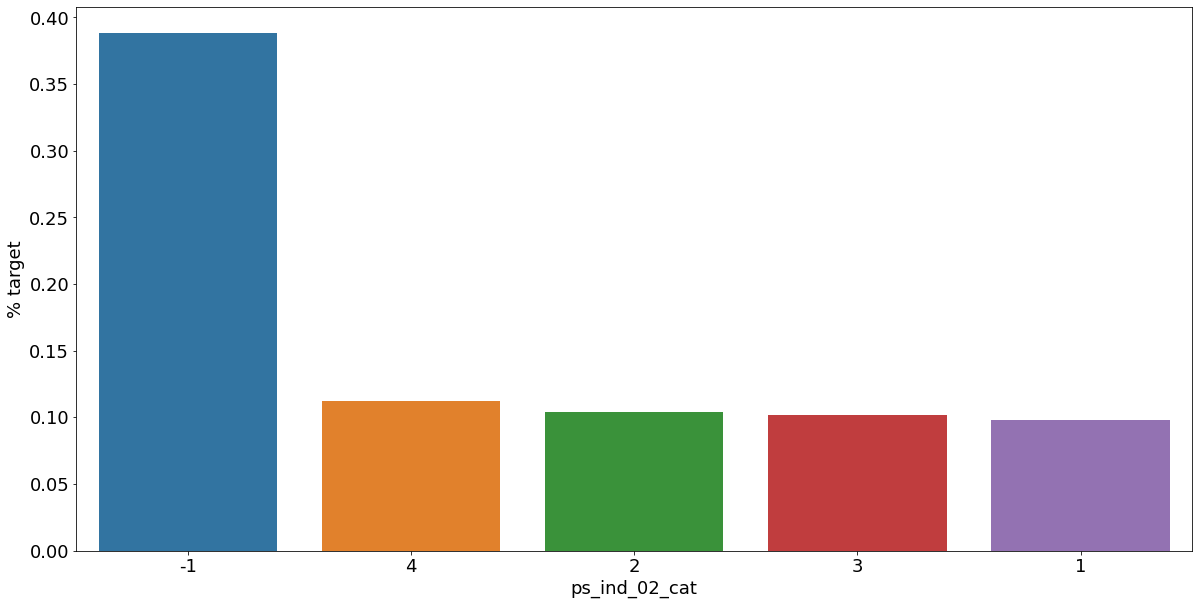

<Figure size 432x288 with 0 Axes>

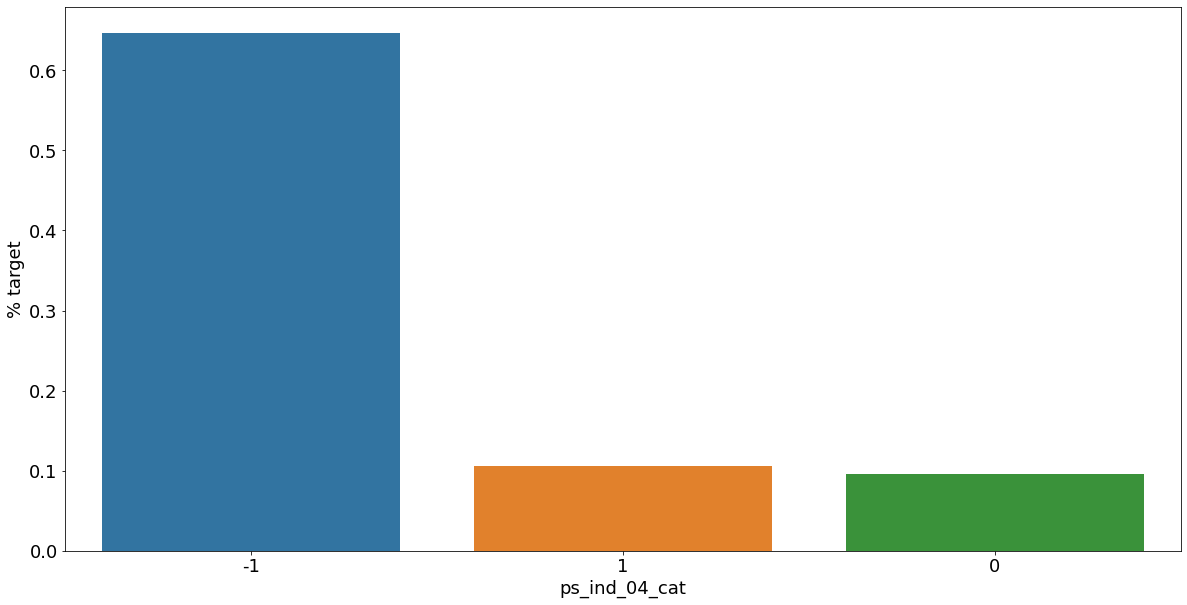

<Figure size 432x288 with 0 Axes>

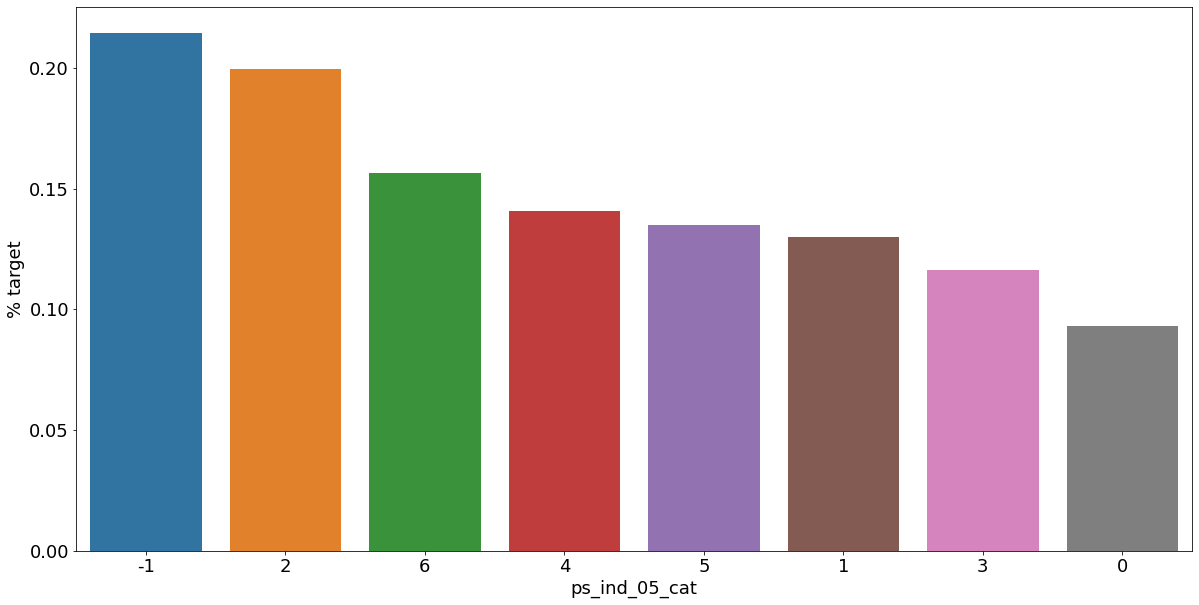

<Figure size 432x288 with 0 Axes>

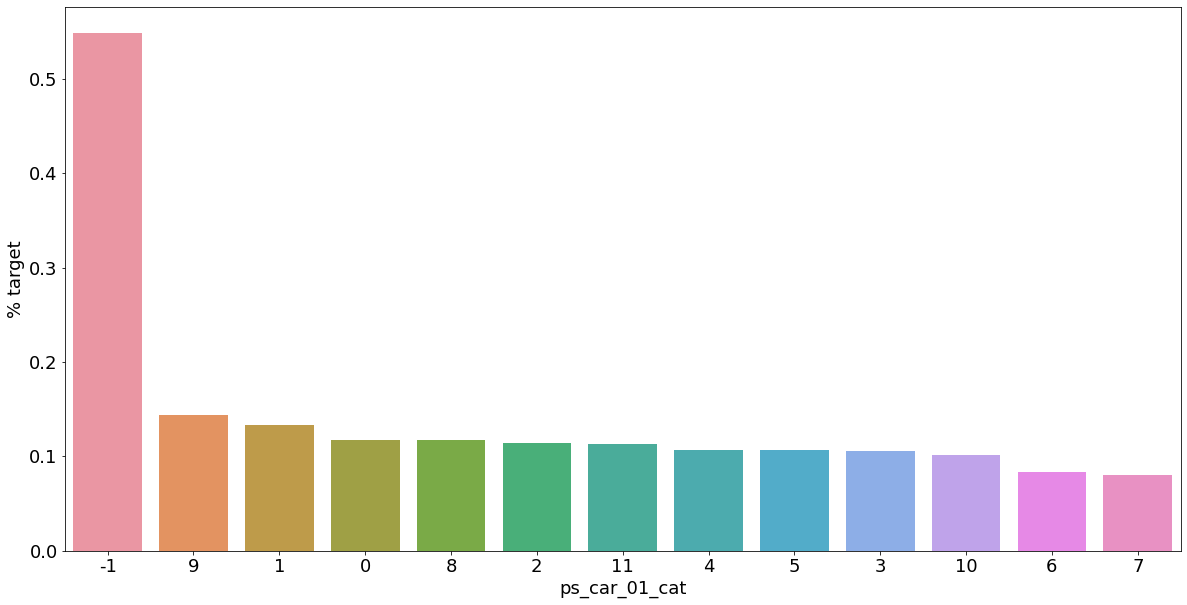

<Figure size 432x288 with 0 Axes>

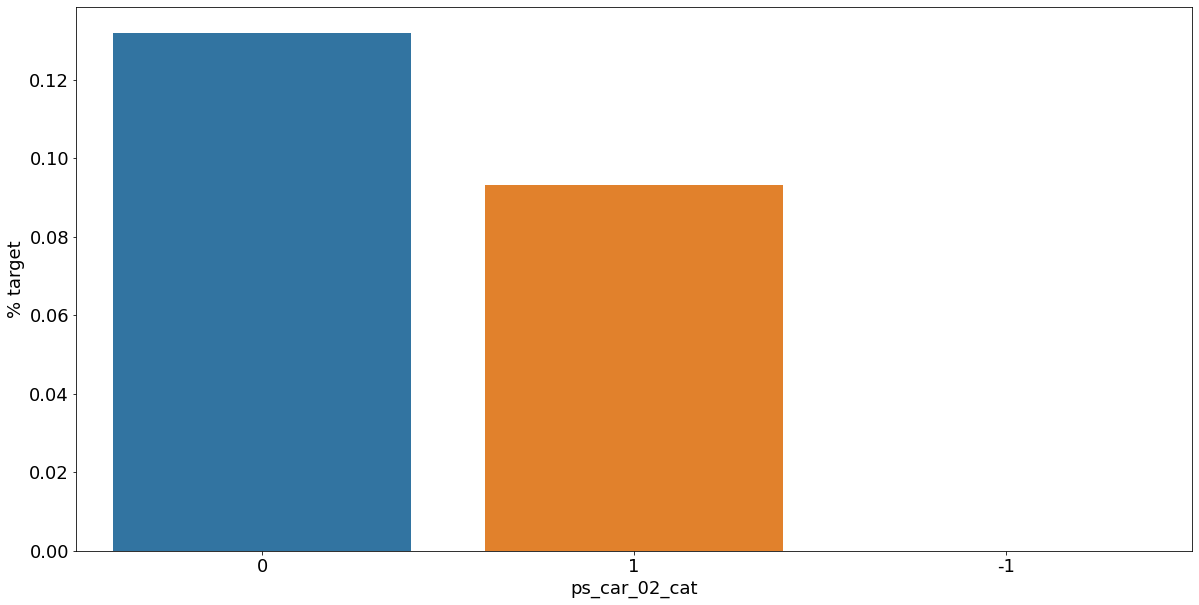

<Figure size 432x288 with 0 Axes>

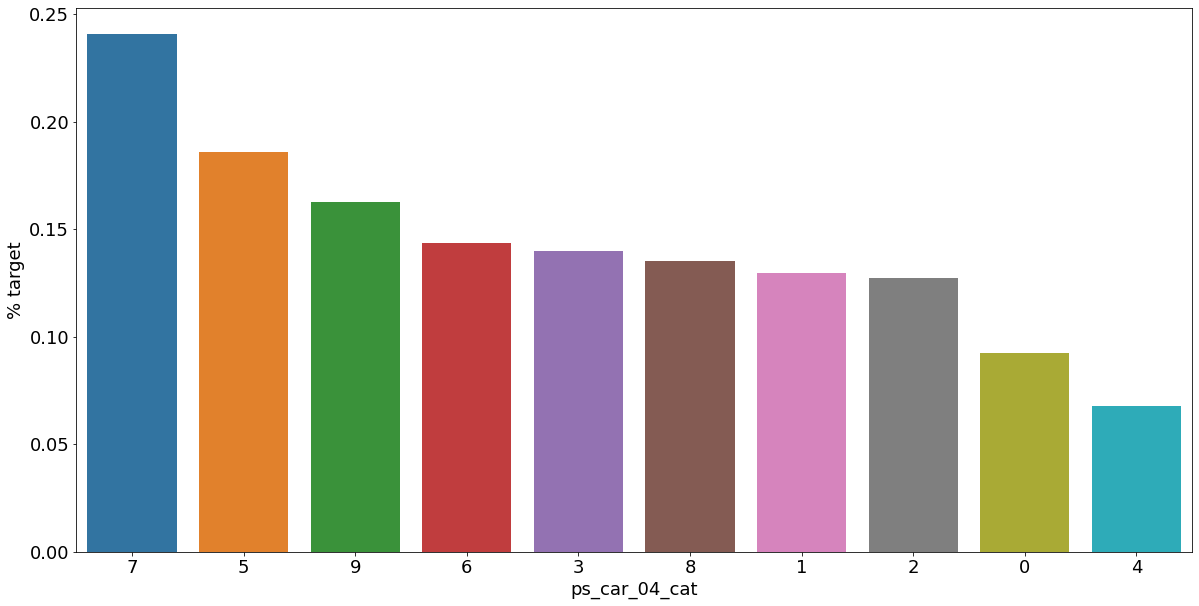

<Figure size 432x288 with 0 Axes>

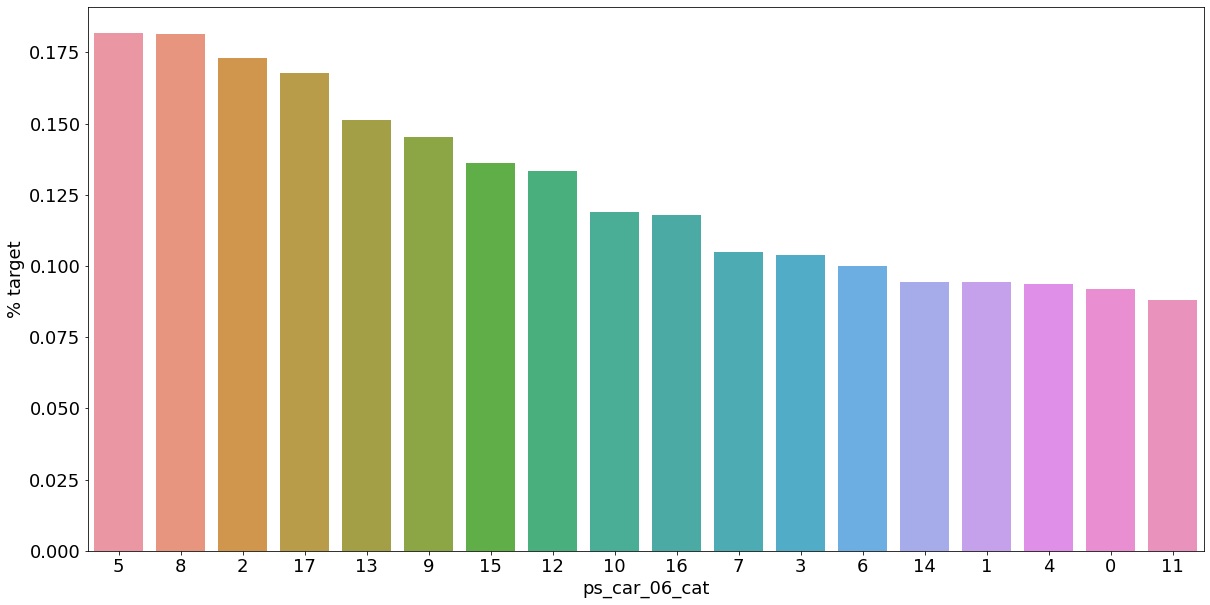

<Figure size 432x288 with 0 Axes>

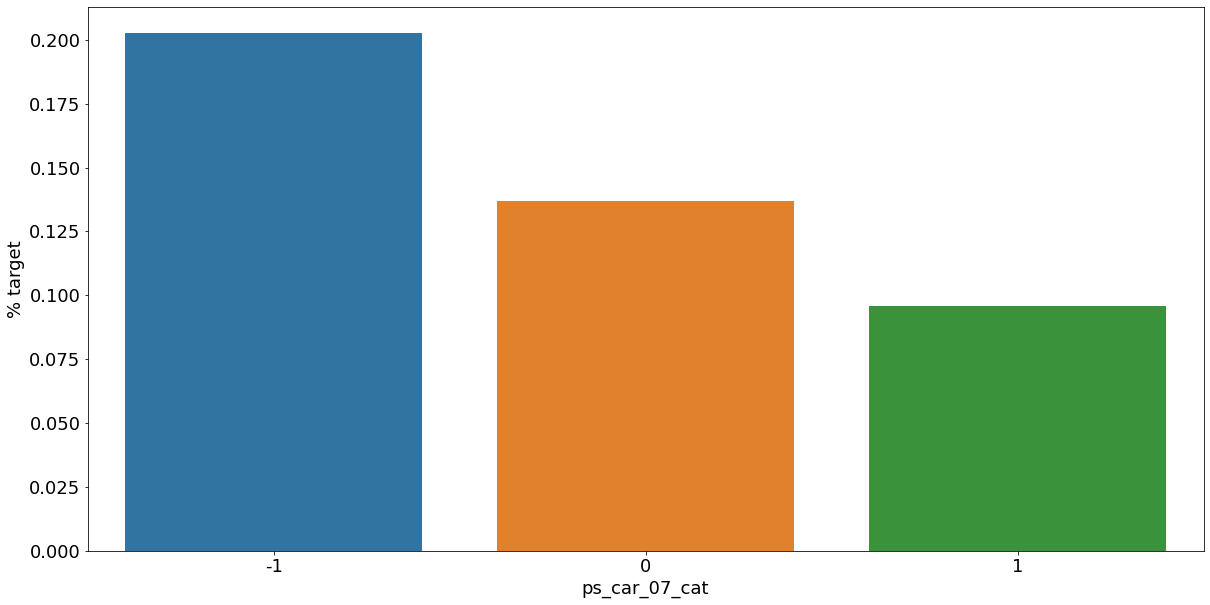

<Figure size 432x288 with 0 Axes>

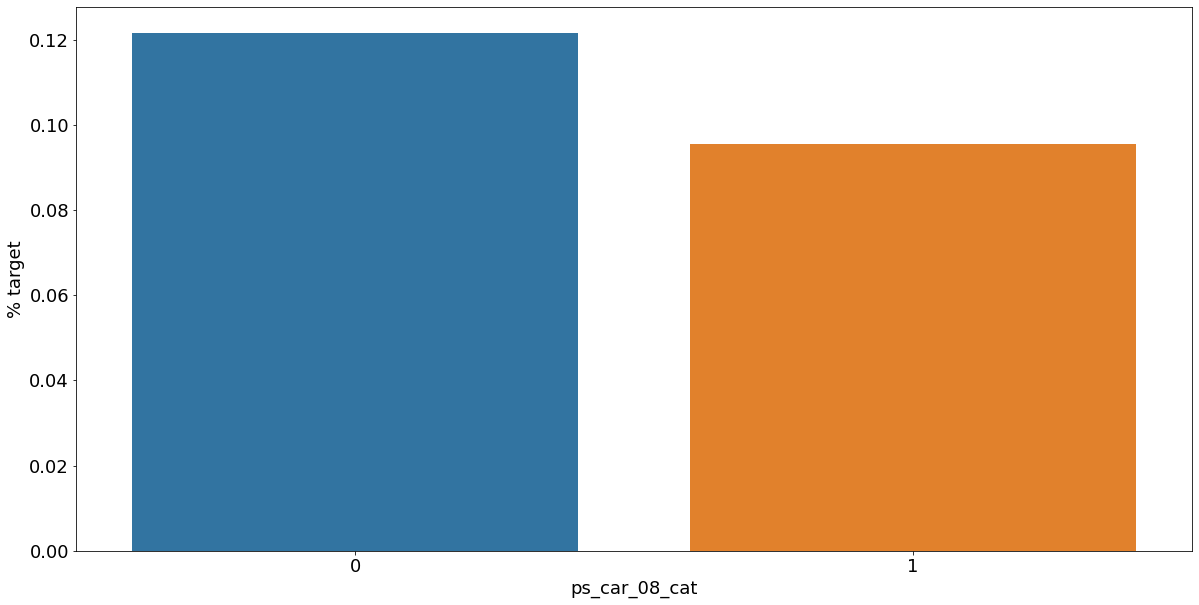

<Figure size 432x288 with 0 Axes>

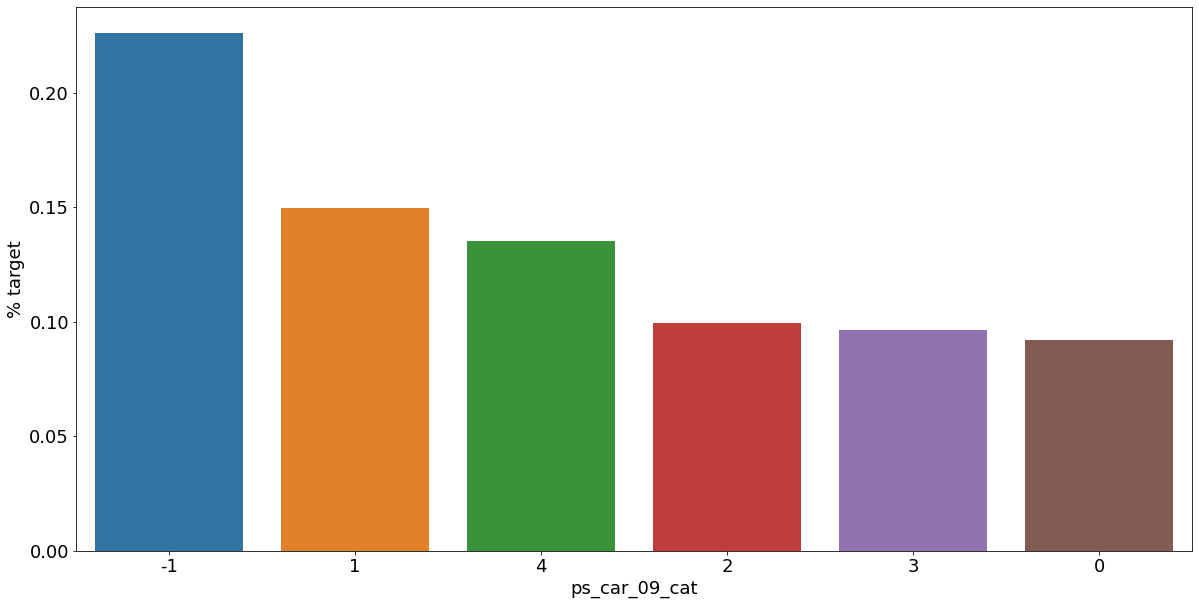

<Figure size 432x288 with 0 Axes>

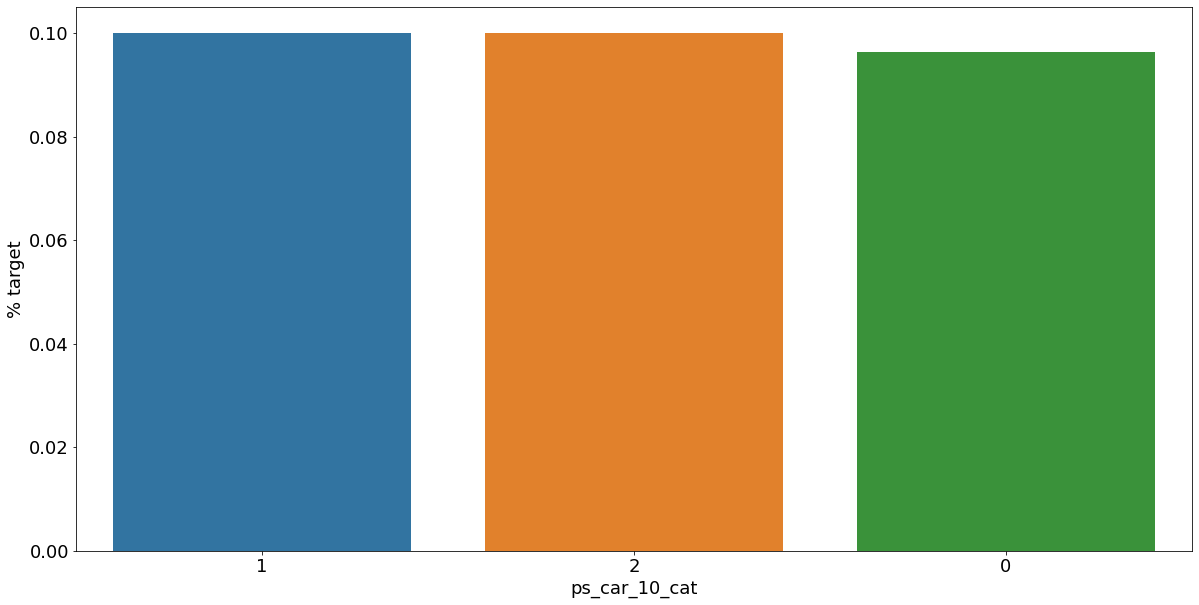

In [25]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
  plt.figure()
  fig, ax = plt.subplots(figsize=(20, 10))
  # Calculate the percentage of target=1 per category value
  cat_perc = train[[f, 'target']].groupby([f], as_index = False).mean()
  cat_perc.sort_values(by='target', ascending=False, inplace=True)
  # Bar plot
  # Order the bars descending on target mean
  sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
  plt.ylabel('% target', fontsize=18)
  plt.xlabel(f, fontsize=18)
  plt.tick_params(axis='both', which='major', labelsize=18)
  plt.show()

**결측값이 있는** 변수에서 알 수 있듯이 결측값을 예를 들어 모드로 대체하는 대신 별도의 범주 값으로 유지하는 것이 좋다. 결측값이 있는 고객은 보험 청구를 요청할 가능성이 훨씬 더 높은(경우에 따라 훨씬 더 낮은)것으로 보인다.

##**6.2 Interval variables**<br>
Interval 변수 간의 상관 관계를 확인한다. Heatmap은 변수 간의 상관 관계를 시각화하는 좋은 방법이다. 아래 코드는 Michael Waskom의 예를 기반으로 한다.

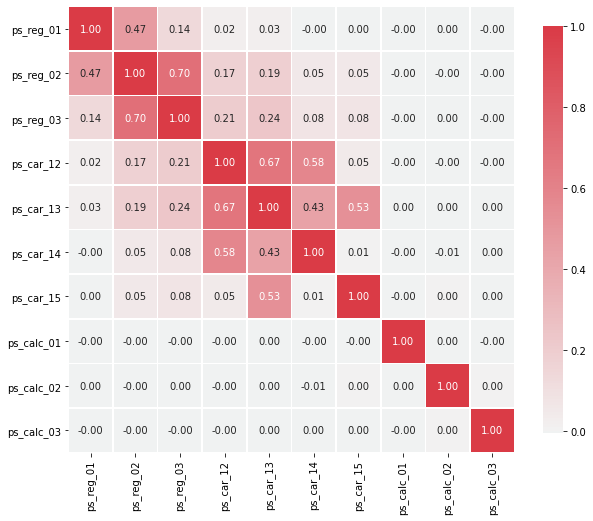

In [26]:
def corr_heatmap(v):
  correlations = train[v].corr()

  # Create color map ranging between two colors
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  fig, ax = plt.subplots(figsize=(10, 10))
  sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
              square=True, linewidths=.5, annot=True, cbar_kws={'shrink': .75})
  plt.show()

v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

변수 간에는 강력한 상관 관계가 있다.<br>
- ps_reg_02 and ps_reg_03 (0.7)
- ps_car_12 and ps_car13 (0.67)
- ps_car_12 and ps_car14 (0.58)
- ps_car_13 and ps_car15 (0.67)

Seaborn에는 변수 간의 (선형)관계를 시각화하는 몇 가지 편리한 플롯이 있다. Pairplot을 사용하여 변수 간의 관계를 시각화 할 수 있다. 그러나 heatmap은 이미 제한된 수의 상관된 변수를 보여주었기 때문에 상관 관계가 높은 각 변수를 개별적으로 살펴 보겠다.

**NOTE** : 프로세스 속도를 높이기 위해 train data 샘플을 가져왔다.

In [27]:
s = train.sample(frac=0.1)

> **ps_reg_02 and ps_reg_03**<br>
회귀선에서 알 수 있듯이 이러한 변수 사이에는 선형 관계가 있다. `hue` 매개 변수 덕분에 `target=0`과 `target=1`에 대한 회귀선이 동일하다는 것을 알 수 있다.

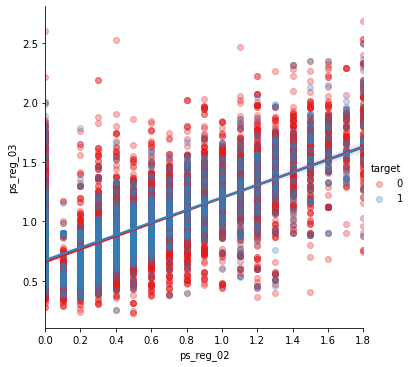

In [28]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

> **ps_car_12 and ps_car_13**

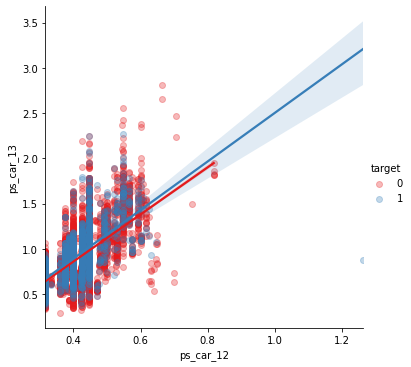

In [29]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

> **ps_car_12 and ps_car_14**

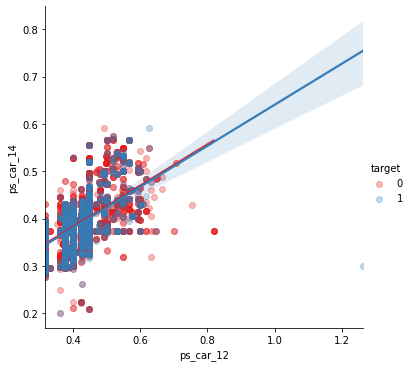

In [30]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

> **ps_car_13 and ps_car_15**

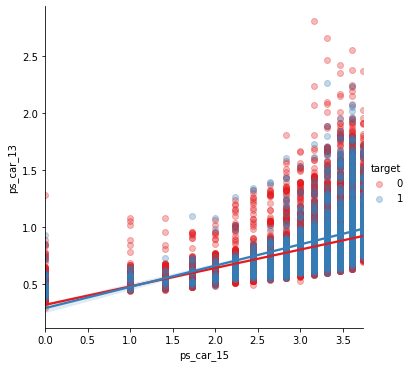

In [31]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

유지할 상관 변수를 어떻게 결정할 수 있을까? 변수에 대해 PCA(주성분 분석)를 수행하여 차원을 줄일 수 있다. 그러나 상관 변수의 수가 적기 때문에 모델이 무거운 작업을 수행하도록 할 것이다.

##**6.3 Checking the correlations between ordinal variables**

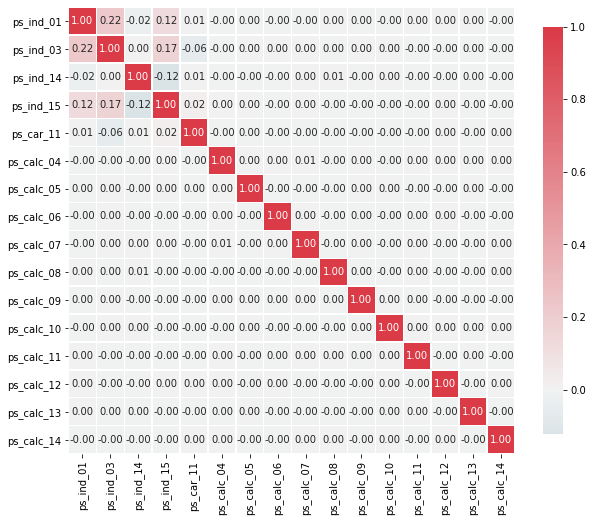

In [32]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

Ordinal 변수의 경우 상관관계가 많지 않다. 반면에 target 값으로 그룹화할 때 분포가 어떻게 되는지 볼 수 있다.

#**7. Feature engineering**

##**7.1 Creating dummy variables**<br>
범주형 변수의 값은 차수나 크기를 나타내지 않는다. 예를 들어 범주 2는 범주 1 값의 두 배가 아니다. 따라서 이를 처리하기 위해 더미 변수를 만들 수 있다. 이 정보는 원래 변수의 범주에 대해 생성된 다른 더미 변수에서 파생될 수 있으므로 첫 번째 더미 변수를 삭제한다.

In [33]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


따라서 더미 변수를 생성하면 train set에 52개의 변수가 추가된다.

##**7.2 Creating ineteraction variables**

In [34]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


이렇게 하면 train data에 추가 상호 작용 변수가 추가된다. `get_feature_names` method 덕분에 이러한 새 변수에 열 이름을 할당할 수 있다.

#**8. Feature selection**

##**8.1 Removing features with low or zero variance**<br>
개인적으로 분류 알고리즘이 유지할 특성을 선택하도록 하는 것을 선호한다. 그러나 우리가 스스로 할 수 있는 것이 한 가지 있다. 이는 변동이 없거나 매우 낮은 특성을 제거하는 것이다. Sklearn에는 **VarianceThreshold**라는 편리한 방법이 있다. 기본적으로 분산이 0인 특성을 제거한다. 이전 단계에서 0 분산 변수가 없음을 확인했으므로 이 대회에는 적용되지 않는다. 그러나 분산이 1% 미만인 특성을 제거하면 31개의 변수가 제거된다.

In [35]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1))   # Fit to train without id and target variables

f = np.vectorize(lambda x : not x)   # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


분산을 기반으로 선택하면 다소 많은 변수를 잃게 된다. 그러나 변수가 너무 많지 않기 때문에 분류기가 선택하도록 할 것이다. 더 많은 변수가 있는 dataset의 경우 처리 시간을 줄일 수 있다.

Sklearn은 또한 다른 특성 선택 방법과 함께 제공된다. 이러한 method 중 하나는 다른 분류기가 최상의 특성을 선택하고 계속 진행하도록 하는 SelectFromModel이다. 아래에서는 Random Forest로 이를 수행하는 방법을 보여 주겠다.

##**8.2 Selecting features with a Random Forest and SelectFromModel**<br>
여기서는 Random Forest의 특성 중요도를 기준으로 특성 선택을 할 것이다. Sklearn의 SelectFromModel을 사용하면 유지할 변수 수를 지정할 수 있다. 특성 중요도 수준에 대한 임계값을 수동으로 설정할 수 있다. 그러나 우리는 단순히 상위 50% 최고의 변수를 선택한다.
>아래 셀의 코드는 Sebastian Raschka의 GitHub 저장소에서 가져 왔다. 이 저장소에는 반드시 읽어야 할 책인 Python Machine Learning의 코드 샘플이 포함되어 있다.

In [36]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021183
 2) ps_car_13                      0.017368
 3) ps_car_12 ps_car_13            0.017322
 4) ps_car_13^2                    0.017189
 5) ps_car_13 ps_car_14            0.017133
 6) ps_reg_03 ps_car_13            0.017076
 7) ps_reg_01 ps_car_13            0.016906
 8) ps_car_13 ps_car_15            0.016844
 9) ps_reg_03 ps_car_14            0.016197
10) ps_reg_03 ps_car_12            0.015534
11) ps_reg_03 ps_car_15            0.015207
12) ps_car_14 ps_car_15            0.015103
13) ps_car_13 ps_calc_01           0.014745
14) ps_reg_01 ps_reg_03            0.014706
15) ps_car_13 ps_calc_03           0.014673
16) ps_reg_02 ps_car_13            0.014658
17) ps_car_13 ps_calc_02           0.014614
18) ps_reg_01 ps_car_14            0.014245
19) ps_reg_03^2                    0.014218
20) ps_reg_03                      0.014213
21) ps_reg_03 ps_calc_03           0.013885
22) ps_reg_03 ps_calc_02           0.013836
23) ps_reg_03 ps_calc_01        

SelectFromModel을 사용하여 사용할 사전 적합 분류기와 특성 중요도에 대한 임계값을 지정할 수 있다. `get_support` method를 사용하면 train data의 변수 수를 제한할 수 있다.

In [37]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection: 81


In [38]:
train = train[selected_vars + ['target']]

#**9. Feature scaling**<br>
앞서 언급했듯이 train data에 표준 확장을 적용할 수 있다. 이 작업이 완료되면 일부 분류기가 더 잘 수행된다.

In [39]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])